In [63]:
import requests, json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1><b>I. CREATE EVENTS PANDAS DATAFRAME</b></h1>

In [2]:
url = 'https://fantasy.premierleague.com/api/'
api_result = requests.get(url + 'bootstrap-static/').json()
events = api_result['events']

df_events_tot = pd.json_normalize(events)
df_events = df_events_tot.drop(columns='chip_plays')  # DO NASTĘPNEJ TABELI

floats = list(df_events.select_dtypes(include=['float64']).columns)  # SELECT FLOAT COLUMNS
df_events[floats] = df_events[floats].fillna(0.0).astype(int)  # CONVERT FLOATS TO INT

df_events.set_index('id', inplace=True)  # SET ID AS INDEX
df_events

df_events = df_events.drop(columns=['deadline_time', 'release_time'])  # DROP IRRELEVANT COLUMNS

df_events['deadline_time_epoch'] = pd.to_datetime(df_events['deadline_time_epoch'], unit='s')  # CONVERT TO DATETIME

df_events

,name,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,...,ranked_count,most_selected,most_transferred_in,top_element,transfers_made,most_captained,most_vice_captained,top_element_info.id,top_element_info.points,top_element_info
id,,,,,,,,,,,,,,,,,,,,,
1,Gameweek 1,64,True,True,3383750,2023-08-11 17:30:00,0,127,False,False,...,0,355,1,395,0,355,19,395,14,0
2,Gameweek 2,44,True,True,3338487,2023-08-18 17:15:00,0,120,False,False,...,0,355,195,108,13130353,355,19,108,16,0
3,Gameweek 3,44,True,True,9368956,2023-08-25 17:30:00,0,128,False,False,...,0,355,108,216,17619532,355,19,216,19,0
4,Gameweek 4,72,True,True,4354697,2023-09-01 17:30:00,0,148,False,False,...,0,355,216,516,16035365,355,19,516,20,0
5,Gameweek 5,44,True,True,6211182,2023-09-16 10:00:00,0,102,False,False,...,0,355,516,344,14363988,355,19,344,13,0
6,Gameweek 6,68,True,True,4494759,2023-09-23 12:30:00,0,142,False,False,...,0,355,343,430,12109066,355,308,430,18,0
7,Gameweek 7,49,True,True,9335002,2023-09-30 10:00:00,0,156,False,False,...,0,355,430,60,15579302,355,308,60,23,0
8,Gameweek 8,44,True,True,10068163,2023-10-07 10:00:00,0,120,False,False,...,0,355,516,216,19444885,355,355,216,16,0
9,Gameweek 9,67,True,True,6931177,2023-10-21 10:00:00,0,152,False,False,...,0,355,60,423,11431916,355,308,423,17,0


<h2>I.1 EVENTS CHARTS</h2>

C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\1157761409.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\1157761409.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')


<Axes: title={'center': 'Transfers made per Gameweek'}, xlabel='name', ylabel='Transfers'>

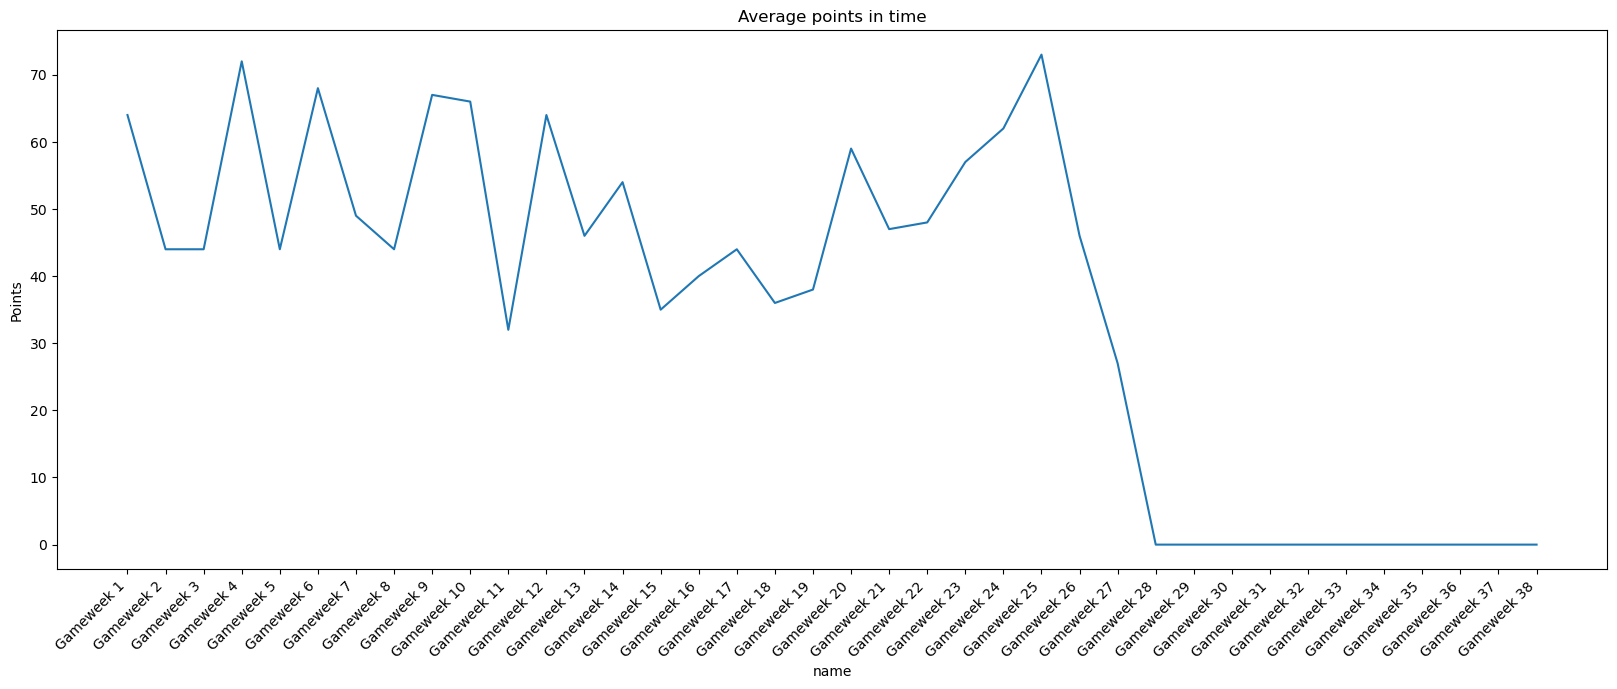

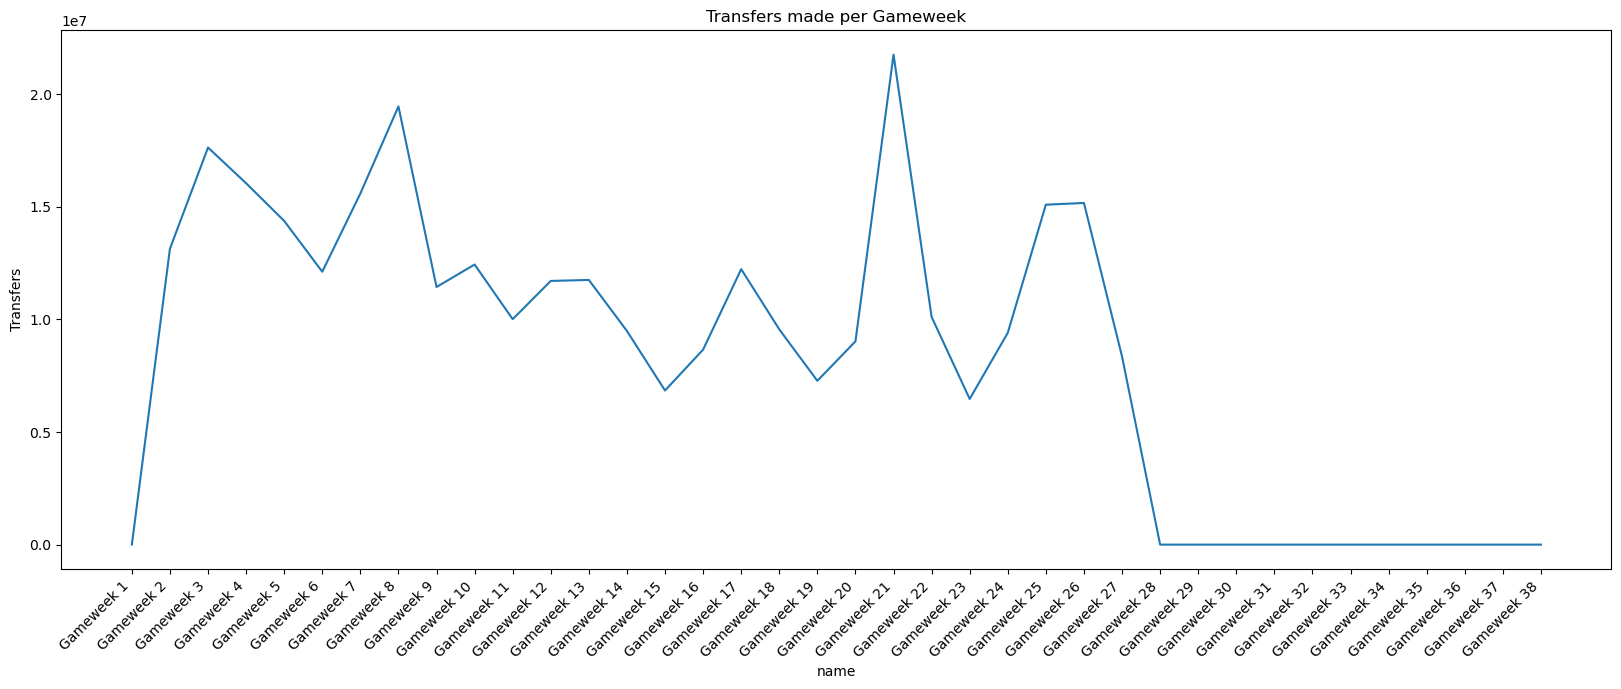

In [3]:
# AVERAGE POINTS IN TIME
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Average points in time')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('Points')
sns.lineplot(data=df_events, x=df_events['name'], y=df_events['average_entry_score'], ax=ax)

# TRANSFERS
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Transfers made per Gameweek')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('Transfers')
sns.lineplot(data=df_events, x=df_events['name'], y=df_events['transfers_made'], ax=ax)

<h1><b>II. CREATE CHIPS PANDAS DATAFRAME</b></h1>

In [4]:
chips = pd.json_normalize(df_events_tot['chip_plays'])

df_chips_bboost = pd.json_normalize(chips[0])
df_chips_bboost = df_chips_bboost.rename(columns={'num_played': 'bboost'})
df_chips_bboost = df_chips_bboost.drop(columns='chip_name')

df_chips_freehit = pd.json_normalize(chips[1])
df_chips_freehit = df_chips_freehit.rename(columns={'num_played': 'freehit'})
df_chips_freehit = df_chips_freehit.drop(columns='chip_name')

df_chips_wildcard = pd.json_normalize(chips[2])
df_chips_wildcard = df_chips_wildcard.rename(columns={'num_played': 'wildcard'})
df_chips_wildcard = df_chips_wildcard.drop(columns='chip_name')

df_chips_3xc = pd.json_normalize(chips[3])
df_chips_3xc = df_chips_3xc.rename(columns={'num_played': '3xc'})
df_chips_3xc = df_chips_3xc.drop(columns='chip_name')

df_chips = df_chips_3xc.join([df_chips_wildcard, df_chips_freehit, df_chips_bboost])
df_chips

df_chips = df_chips.fillna(0.0).astype(int)  # CONVERT FLOATS TO INT
df_chips

df_chips['id'] = pd.RangeIndex(1, len(df_chips) + 1)  # SET ID AS INDEX
df_chips.set_index('id', inplace=True)

df_chips['name'] = df_events['name']

df_chips

,3xc,wildcard,freehit,bboost,name
id,,,,,
1,0,0,287198,163222,Gameweek 1
2,213828,244166,112568,126778,Gameweek 2
3,245013,445328,111065,124110,Gameweek 3
4,164388,406918,119294,109196,Gameweek 4
5,123443,387941,81067,96469,Gameweek 5
6,192955,283333,60517,78528,Gameweek 6
7,90244,380176,141888,79672,Gameweek 7
8,67206,675746,149680,53401,Gameweek 8
9,56575,328588,67685,50175,Gameweek 9


<h2>I.1 CHIPS CHARTS</h2>

C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\798145686.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\798145686.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\798145686.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\798145686.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_events.name, rotation=45, ha='right')


<Axes: title={'center': 'Benchboost chip played in time'}, xlabel='name', ylabel='No. of bboosts'>

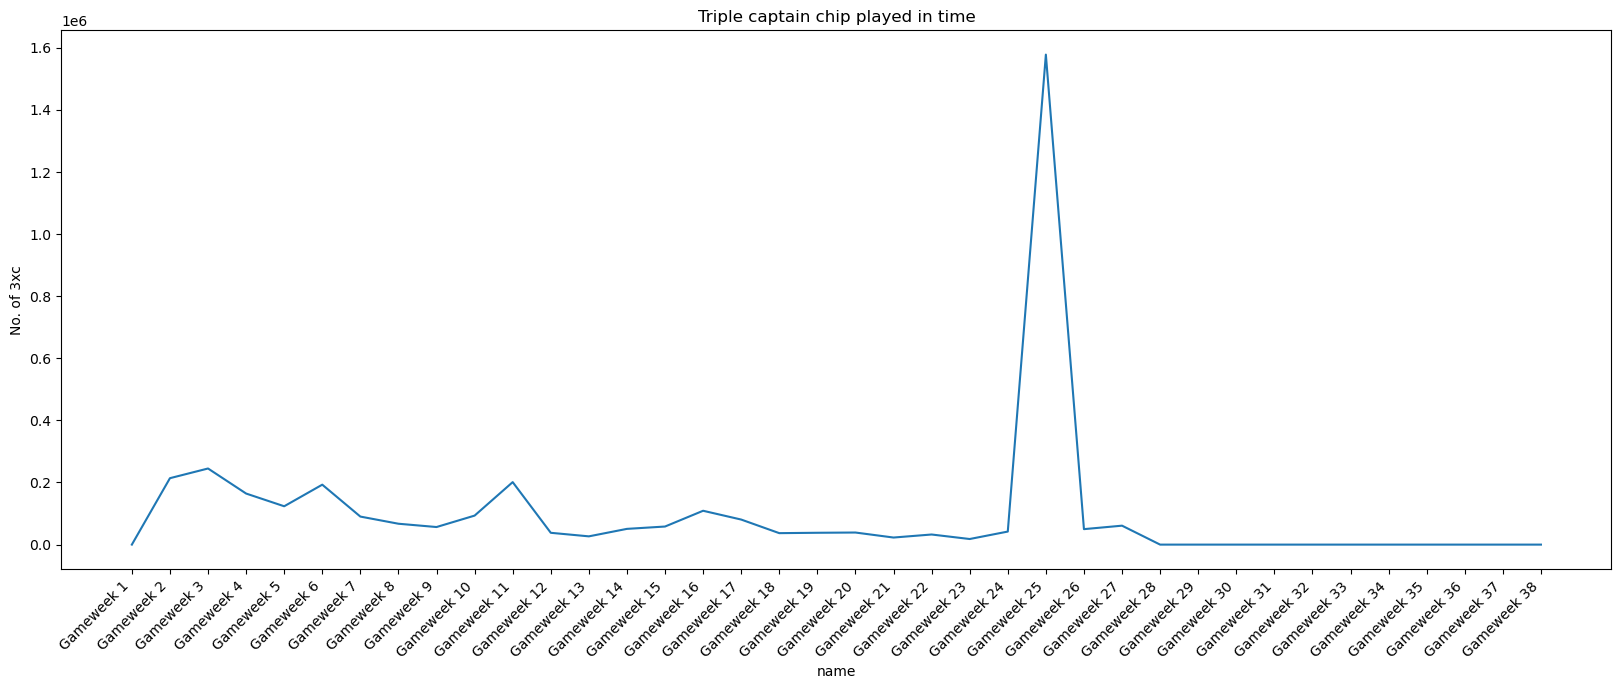

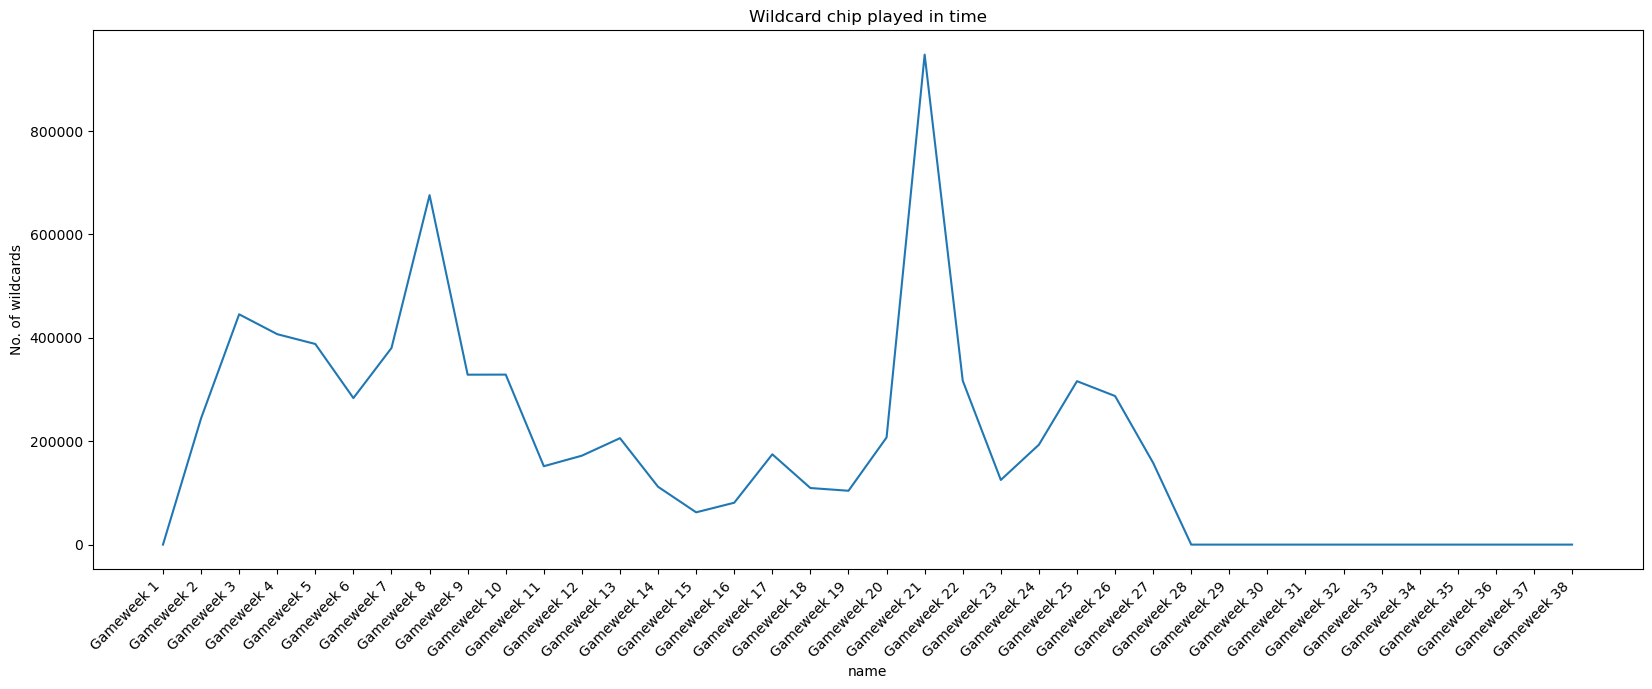

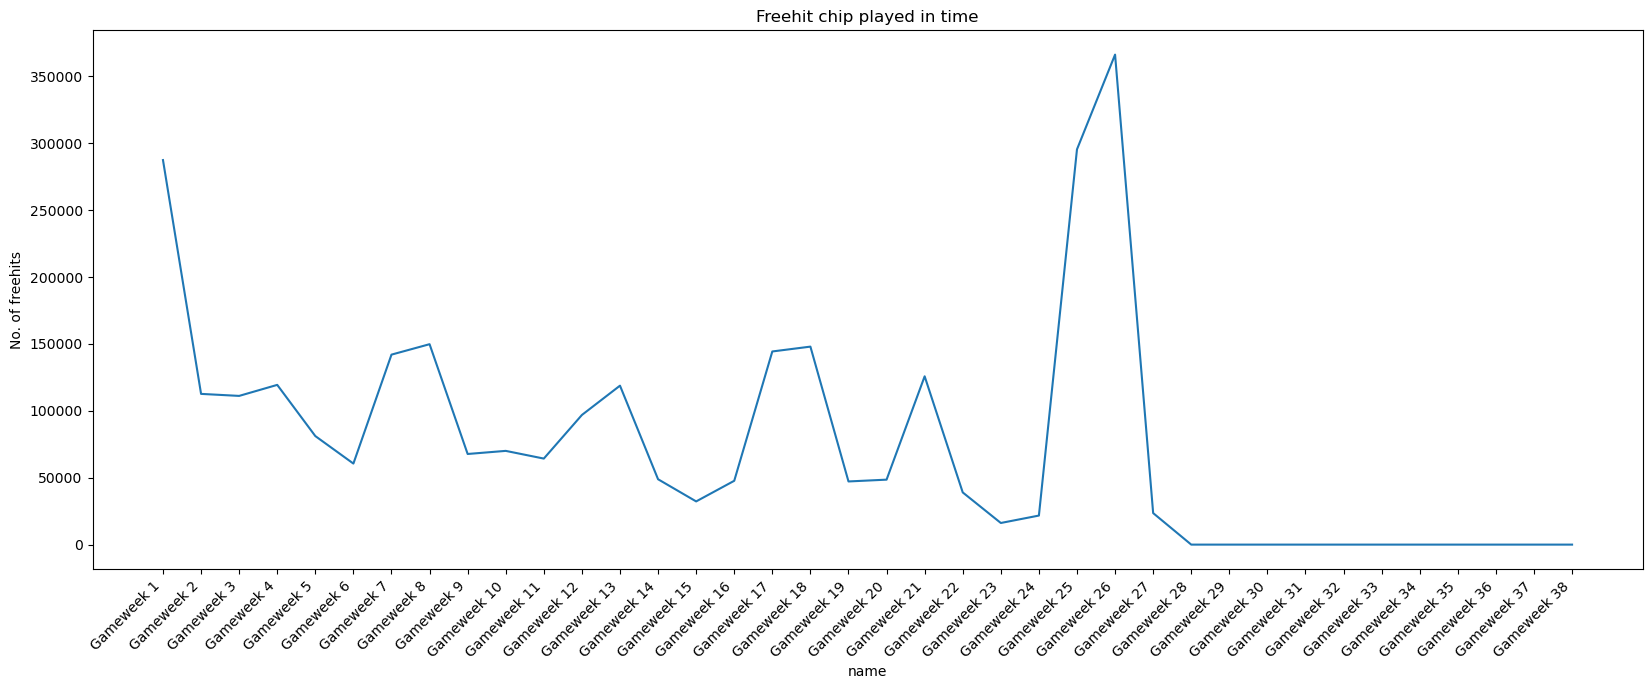

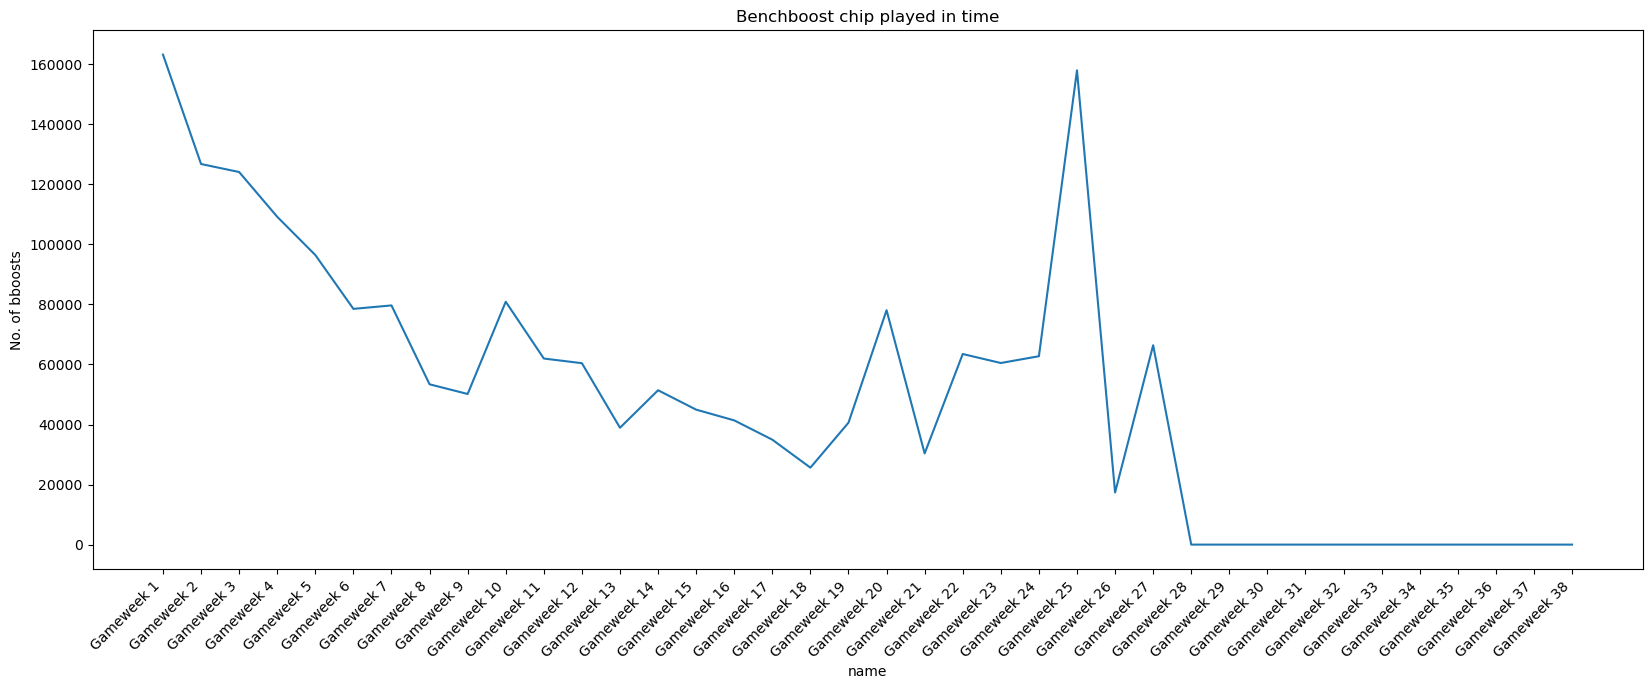

In [5]:
# TRIPLE CAPTAINS PLAYED
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Triple captain chip played in time')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('No. of 3xc')
sns.lineplot(data=df_chips, x=df_chips['name'], y=df_chips['3xc'], ax=ax)

# WILDCARDS PLAYED
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Wildcard chip played in time')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('No. of wildcards')
sns.lineplot(data=df_chips, x=df_chips['name'], y=df_chips['wildcard'], ax=ax)

# FREEHIT PLAYED
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Freehit chip played in time')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('No. of freehits')
sns.lineplot(data=df_chips, x=df_chips['name'], y=df_chips['freehit'], ax=ax)

# BENCHBOOST PLAYED
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Benchboost chip played in time')
ax.set_xticklabels(df_events.name, rotation=45, ha='right')
ax.set_ylabel('No. of bboosts')
sns.lineplot(data=df_chips, x=df_chips['name'], y=df_chips['bboost'], ax=ax)

<h1><b>II. CREATE PLAYERS PANDAS DATAFRAME</b></h1>

In [6]:
players = api_result['elements']
df_players = pd.json_normalize(players)
player_columns = list(df_players.columns)
player_columns_reoder = ['second_name', 'first_name', 'id', 'team', 'element_type', 'total_points', 'points_per_game',
                         'chance_of_playing_next_round',
                         'chance_of_playing_this_round',
                         'code',
                         'cost_change_event',
                         'cost_change_event_fall',
                         'cost_change_start',
                         'cost_change_start_fall',
                         'dreamteam_count',
                         'ep_next',
                         'ep_this',
                         'event_points',
                         'form',
                         'in_dreamteam',
                         'news',
                         'news_added',
                         'now_cost',
                         'photo',
                         'selected_by_percent',
                         'special',
                         'squad_number',
                         'status',
                         'team_code',
                         'transfers_in',
                         'transfers_in_event',
                         'transfers_out',
                         'transfers_out_event',
                         'value_form',
                         'value_season',
                         'web_name',
                         'minutes',
                         'goals_scored',
                         'assists',
                         'clean_sheets',
                         'goals_conceded',
                         'own_goals',
                         'penalties_saved',
                         'penalties_missed',
                         'yellow_cards',
                         'red_cards',
                         'saves',
                         'bonus',
                         'bps',
                         'influence',
                         'creativity',
                         'threat',
                         'ict_index',
                         'starts',
                         'expected_goals',
                         'expected_assists',
                         'expected_goal_involvements',
                         'expected_goals_conceded',
                         'influence_rank',
                         'influence_rank_type',
                         'creativity_rank',
                         'creativity_rank_type',
                         'threat_rank',
                         'threat_rank_type',
                         'ict_index_rank',
                         'ict_index_rank_type',
                         'corners_and_indirect_freekicks_order',
                         'corners_and_indirect_freekicks_text',
                         'direct_freekicks_order',
                         'direct_freekicks_text',
                         'penalties_order',
                         'penalties_text',
                         'expected_goals_per_90',
                         'saves_per_90',
                         'expected_assists_per_90',
                         'expected_goal_involvements_per_90',
                         'expected_goals_conceded_per_90',
                         'goals_conceded_per_90',
                         'now_cost_rank',
                         'now_cost_rank_type',
                         'form_rank',
                         'form_rank_type',
                         'points_per_game_rank',
                         'points_per_game_rank_type',
                         'selected_rank',
                         'selected_rank_type',
                         'starts_per_90',
                         'clean_sheets_per_90']

df_players = df_players.reindex(columns=player_columns_reoder)
df_players = df_players.sort_values(['element_type', 'team'])
df_players.index = np.arange(1, len(df_players) + 1)
df_players

,second_name,first_name,id,team,element_type,total_points,points_per_game,chance_of_playing_next_round,chance_of_playing_this_round,code,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
1,Ramsdale,Aaron,17,1,1,17,3.4,NaN,NaN,225321,...,390,21,637,91,102,13,71,12,1.00,0.40
2,Rúnarsson,Rúnar Alex,18,1,1,0,0.0,0.0,0.0,115918,...,685,43,458,57,576,63,456,65,0.00,0.00
3,Raya Martin,David,113,1,1,81,3.9,100.0,100.0,154561,...,183,8,80,7,55,6,51,11,1.00,0.38
4,Hein,Karl,646,1,1,0,0.0,NaN,NaN,463748,...,731,57,498,71,615,77,505,69,0.00,0.00
5,Martínez Romero,Emiliano,49,2,1,86,3.3,100.0,100.0,98980,...,134,4,102,8,114,15,28,4,1.00,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Marshall,Callum,785,19,4,0,0.0,0.0,0.0,565431,...,497,94,717,81,773,94,823,108,0.00,0.00
828,Silva,Fábio,552,20,4,8,1.0,0.0,0.0,449988,...,160,39,796,97,499,64,355,55,1.04,0.35
829,Kalajdzic,Sasa,562,20,4,24,2.2,0.0,0.0,429414,...,257,57,771,92,276,40,400,64,0.57,0.57
830,Santos Carneiro Da Cunha,Matheus,590,20,4,108,4.5,0.0,0.0,430871,...,107,30,60,10,28,7,127,22,1.10,0.23


<h2>III.1 CREATE PANDAS DATAFRAME FOR EACH POSITION</h2>

In [7]:
# GOALKEEPERS
df_goalkeepers = df_players.loc[df_players.element_type == 1]
df_goalkeepers

# DEFENDERS
df_defenders = df_players.loc[df_players.element_type == 2]
df_defenders.index = np.arange(1, len(df_defenders) + 1)
df_defenders

# MIDFIELDERS
df_midlefielders = df_players.loc[df_players.element_type == 3]
df_midlefielders.index = np.arange(1, len(df_midlefielders) + 1)
df_midlefielders

# FORWARDS
df_forwards = df_players.loc[df_players.element_type == 4]
df_forwards.index = np.arange(1, len(df_forwards) + 1)
df_forwards

,second_name,first_name,id,team,element_type,total_points,points_per_game,chance_of_playing_next_round,chance_of_playing_this_round,code,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
1,Balogun,Folarin,1,1,4,0,0.0,0.0,0.0,232223,...,552,101,598,54,686,74,334,53,0.00,0.00
2,Fernando de Jesus,Gabriel,8,1,4,63,3.7,100.0,100.0,205651,...,18,6,828,107,77,16,120,20,1.07,0.58
3,Nketiah,Eddie,13,1,4,68,2.8,100.0,100.0,205533,...,166,41,312,39,175,30,97,16,0.87,0.52
4,Davis,Keinan,39,2,4,0,0.0,0.0,0.0,221239,...,246,53,768,91,799,100,397,63,0.00,0.00
5,Durán,Jhon,44,2,4,24,1.7,0.0,0.0,476344,...,209,47,787,95,356,46,367,56,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Marshall,Callum,785,19,4,0,0.0,0.0,0.0,565431,...,497,94,717,81,773,94,823,108,0.00,0.00
105,Silva,Fábio,552,20,4,8,1.0,0.0,0.0,449988,...,160,39,796,97,499,64,355,55,1.04,0.35
106,Kalajdzic,Sasa,562,20,4,24,2.2,0.0,0.0,429414,...,257,57,771,92,276,40,400,64,0.57,0.57
107,Santos Carneiro Da Cunha,Matheus,590,20,4,108,4.5,0.0,0.0,430871,...,107,30,60,10,28,7,127,22,1.10,0.23


<h1><b>IV. CREATE TEAMS PANDAS DATAFRAME</b></h1>

In [8]:
teams = api_result['teams']
df_teams = pd.json_normalize(teams)

df_teams.set_index('id', inplace=True)  # SET ID AS INDEX
list(df_teams.columns)
teams_columns_reorder = ['code', 'name', 'short_name', 'win',
                         'draw',
                         'loss',
                         'played',
                         'points',
                         'position', 'form',
                         'strength',
                         'team_division',
                         'strength_overall_home',
                         'strength_overall_away',
                         'strength_attack_home',
                         'strength_attack_away',
                         'strength_defence_home',
                         'strength_defence_away',
                         'pulse_id',
                         'unavailable']

df_teams = df_teams.reindex(columns=teams_columns_reorder)

df_teams

,code,name,short_name,win,draw,loss,played,points,position,form,strength,team_division,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id,unavailable
id,,,,,,,,,,,,,,,,,,,,
1,3,Arsenal,ARS,0,0,0,0,0,0,None,4,None,1220,1260,1270,1280,1170,1240,1,False
2,7,Aston Villa,AVL,0,0,0,0,0,0,None,3,None,1130,1235,1120,1220,1130,1250,2,False
3,91,Bournemouth,BOU,0,0,0,0,0,0,None,3,None,1095,1100,1070,1120,1130,1110,127,False
4,94,Brentford,BRE,0,0,0,0,0,0,None,3,None,1120,1155,1120,1130,1120,1180,130,False
5,36,Brighton,BHA,0,0,0,0,0,0,None,3,None,1130,1185,1100,1120,1160,1250,131,False
6,90,Burnley,BUR,0,0,0,0,0,0,None,3,None,1070,1080,1080,1060,1060,1060,43,False
7,8,Chelsea,CHE,0,0,0,0,0,0,None,3,None,1125,1170,1100,1180,1160,1180,4,False
8,31,Crystal Palace,CRY,0,0,0,0,0,0,None,3,None,1095,1100,1110,1150,1090,1085,6,False
9,11,Everton,EVE,0,0,0,0,0,0,None,3,None,1095,1100,1110,1140,1080,1110,7,False


<h1><b> V. GET INFO ON CHOSEN PLAYER PERFORMANCE</b></h1>

In [119]:
def get_info(player_id):
    url_player = f'https://fantasy.premierleague.com/api/element-summary/{player_id}/'
    api_result_player = requests.get(url_player).json()
    stats = api_result_player['history']
    df_stats = pd.json_normalize(stats)
    df_stats.index = np.arange(1, len(df_stats) + 1)
    exp = ['expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']
    df_stats[exp] = df_stats[exp].astype('float64')

    if int(df_players['element_type'].loc[df_players['id'] == player_id]) == [1, 2]:

        fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(20, 35))
        fig.tight_layout()

        # MINUTES PLAYED
        ax[0].set_title('Minutes played')
        ax[0].set_ylabel('Minutes')
        ax[0].set_xlabel('Gameweek')
        ax[0] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['minutes'], ax=ax[0])
        ax[0].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # POINTS PER GAMEWEEK
        ax[1].set_title('Total points')
        ax[1].set_ylabel('Points')
        ax[1].set_xlabel('Gameweek')
        ax[1] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['total_points'], ax=ax[1])
        ax[1].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # CLEAN SHEETS
        ax[2].set_title('Clean sheets')
        ax[2].set_ylabel('Clean sheets')
        ax[2].set_xlabel('Gameweek')
        ax[2] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['clean_sheets'], ax=ax[2])
        ax[2].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # GOALS SCORED
        ax[3].set_title('Goals scored')
        ax[3].set_ylabel('Goals')
        ax[3].set_xlabel('Gameweek')
        ax[3] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['goals_scored'], ax=ax[3])
        ax[3].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # ASSISTS
        ax[4].set_title('Assists')
        ax[4].set_ylabel('Assists')
        ax[4].set_xlabel('Gameweek')
        ax[4] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['assists'], ax=ax[4])
        ax[4].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # EXPECTED GOALS CONCEDED
        ax[5].set_title('Expected goals conceded')
        ax[5].set_ylabel('xGC')
        ax[5].set_xlabel('Gameweek')
        ax[5] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['expected_goals_conceded'], ax=ax[5])
        ax[5].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # EXPECTED GOALS
        ax[6].set_title('Expected goals')
        ax[6].set_ylabel('xG')
        ax[6].set_xlabel('Gameweek')
        ax[6] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['expected_goals'], ax=ax[6])
        ax[6].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # EXPECTED ASSISTS
        ax[7].set_title('Expected assists')
        ax[7].set_ylabel('xA')
        ax[7].set_xlabel('Gameweek')
        ax[7] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['expected_assists'], ax=ax[7])
        ax[7].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # VALUE
        ax[8].set_title('Value in time')
        ax[8].set_ylabel('Value')
        ax[8].set_xlabel('Gameweek')
        ax[8] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['value'], ax=ax[8])
        ax[8].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # TRANSFERS IN
        ax[9].set_title('No. of transfers in')
        ax[9].set_ylabel('Transfers')
        ax[9].set_xlabel('Gameweek')
        ax[9] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['transfers_in'], ax=ax[9])
        ax[9].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # TRANSFERS OUT
        ax[10].set_title('No. of transfers out')
        ax[10].set_ylabel('Transfers')
        ax[10].set_xlabel('Gameweek')
        ax[10] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['transfers_out'], ax=ax[10])
        ax[10].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

    else:

        fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(20, 35), constrained_layout=True)

        # MINUTES PLAYED
        ax[0].set_title('Minutes played')
        ax[0].set_ylabel('Minutes')
        ax[0].set_xlabel('Gameweek')
        ax[0] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['minutes'], ax=ax[0])
        ax[0].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # POINTS PER GAMEWEEK
        ax[1].set_title('Total points')
        ax[1].set_ylabel('Points')
        ax[1].set_xlabel('Gameweek')
        ax[1] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['total_points'], ax=ax[1])
        ax[1].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # GOALS SCORED
        ax[2].set_title('Goals scored')
        ax[2].set_ylabel('Goals')
        ax[2].set_xlabel('Gameweek')
        ax[2] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['goals_scored'], ax=ax[2])
        ax[2].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # ASSISTS
        ax[3].set_title('Assists')
        ax[3].set_ylabel('Assists')
        ax[3].set_xlabel('Gameweek')
        ax[3] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['assists'], ax=ax[3])
        ax[3].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # EXPECTED GOALS
        ax[4].set_title('Expected goals')
        ax[4].set_ylabel('xG')
        ax[4].set_xlabel('Gameweek')
        ax[4] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['expected_goals'], ax=ax[4])
        ax[4].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # EXPECTED ASSISTS
        ax[5].set_title('Expected assists')
        ax[5].set_ylabel('xA')
        ax[5].set_xlabel('Gameweek')
        ax[5] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['expected_assists'], ax=ax[5])
        ax[5].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # VALUE
        ax[6].set_title('Value in time')
        ax[6].set_ylabel('Value')
        ax[6].set_xlabel('Gameweek')
        ax[6] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['value'], ax=ax[6])
        ax[6].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # TRANSFERS IN
        ax[7].set_title('No. of transfers in')
        ax[7].set_ylabel('Transfers')
        ax[7].set_xlabel('Gameweek')
        ax[7] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['transfers_in'], ax=ax[7])
        ax[7].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

        # TRANSFERS OUT
        ax[8].set_title('No. of transfers out')
        ax[8].set_ylabel('Transfers')
        ax[8].set_xlabel('Gameweek')
        ax[8] = sns.lineplot(data=df_stats, x=df_stats.index, y=df_stats['transfers_out'], ax=ax[8])
        ax[8].set(xticks=np.arange(min(df_stats.index), max(df_stats.index)+1))

    return df_players['second_name'].loc[df_players['id'] == player_id]

725    Fernando de Jesus
Name: second_name, dtype: object

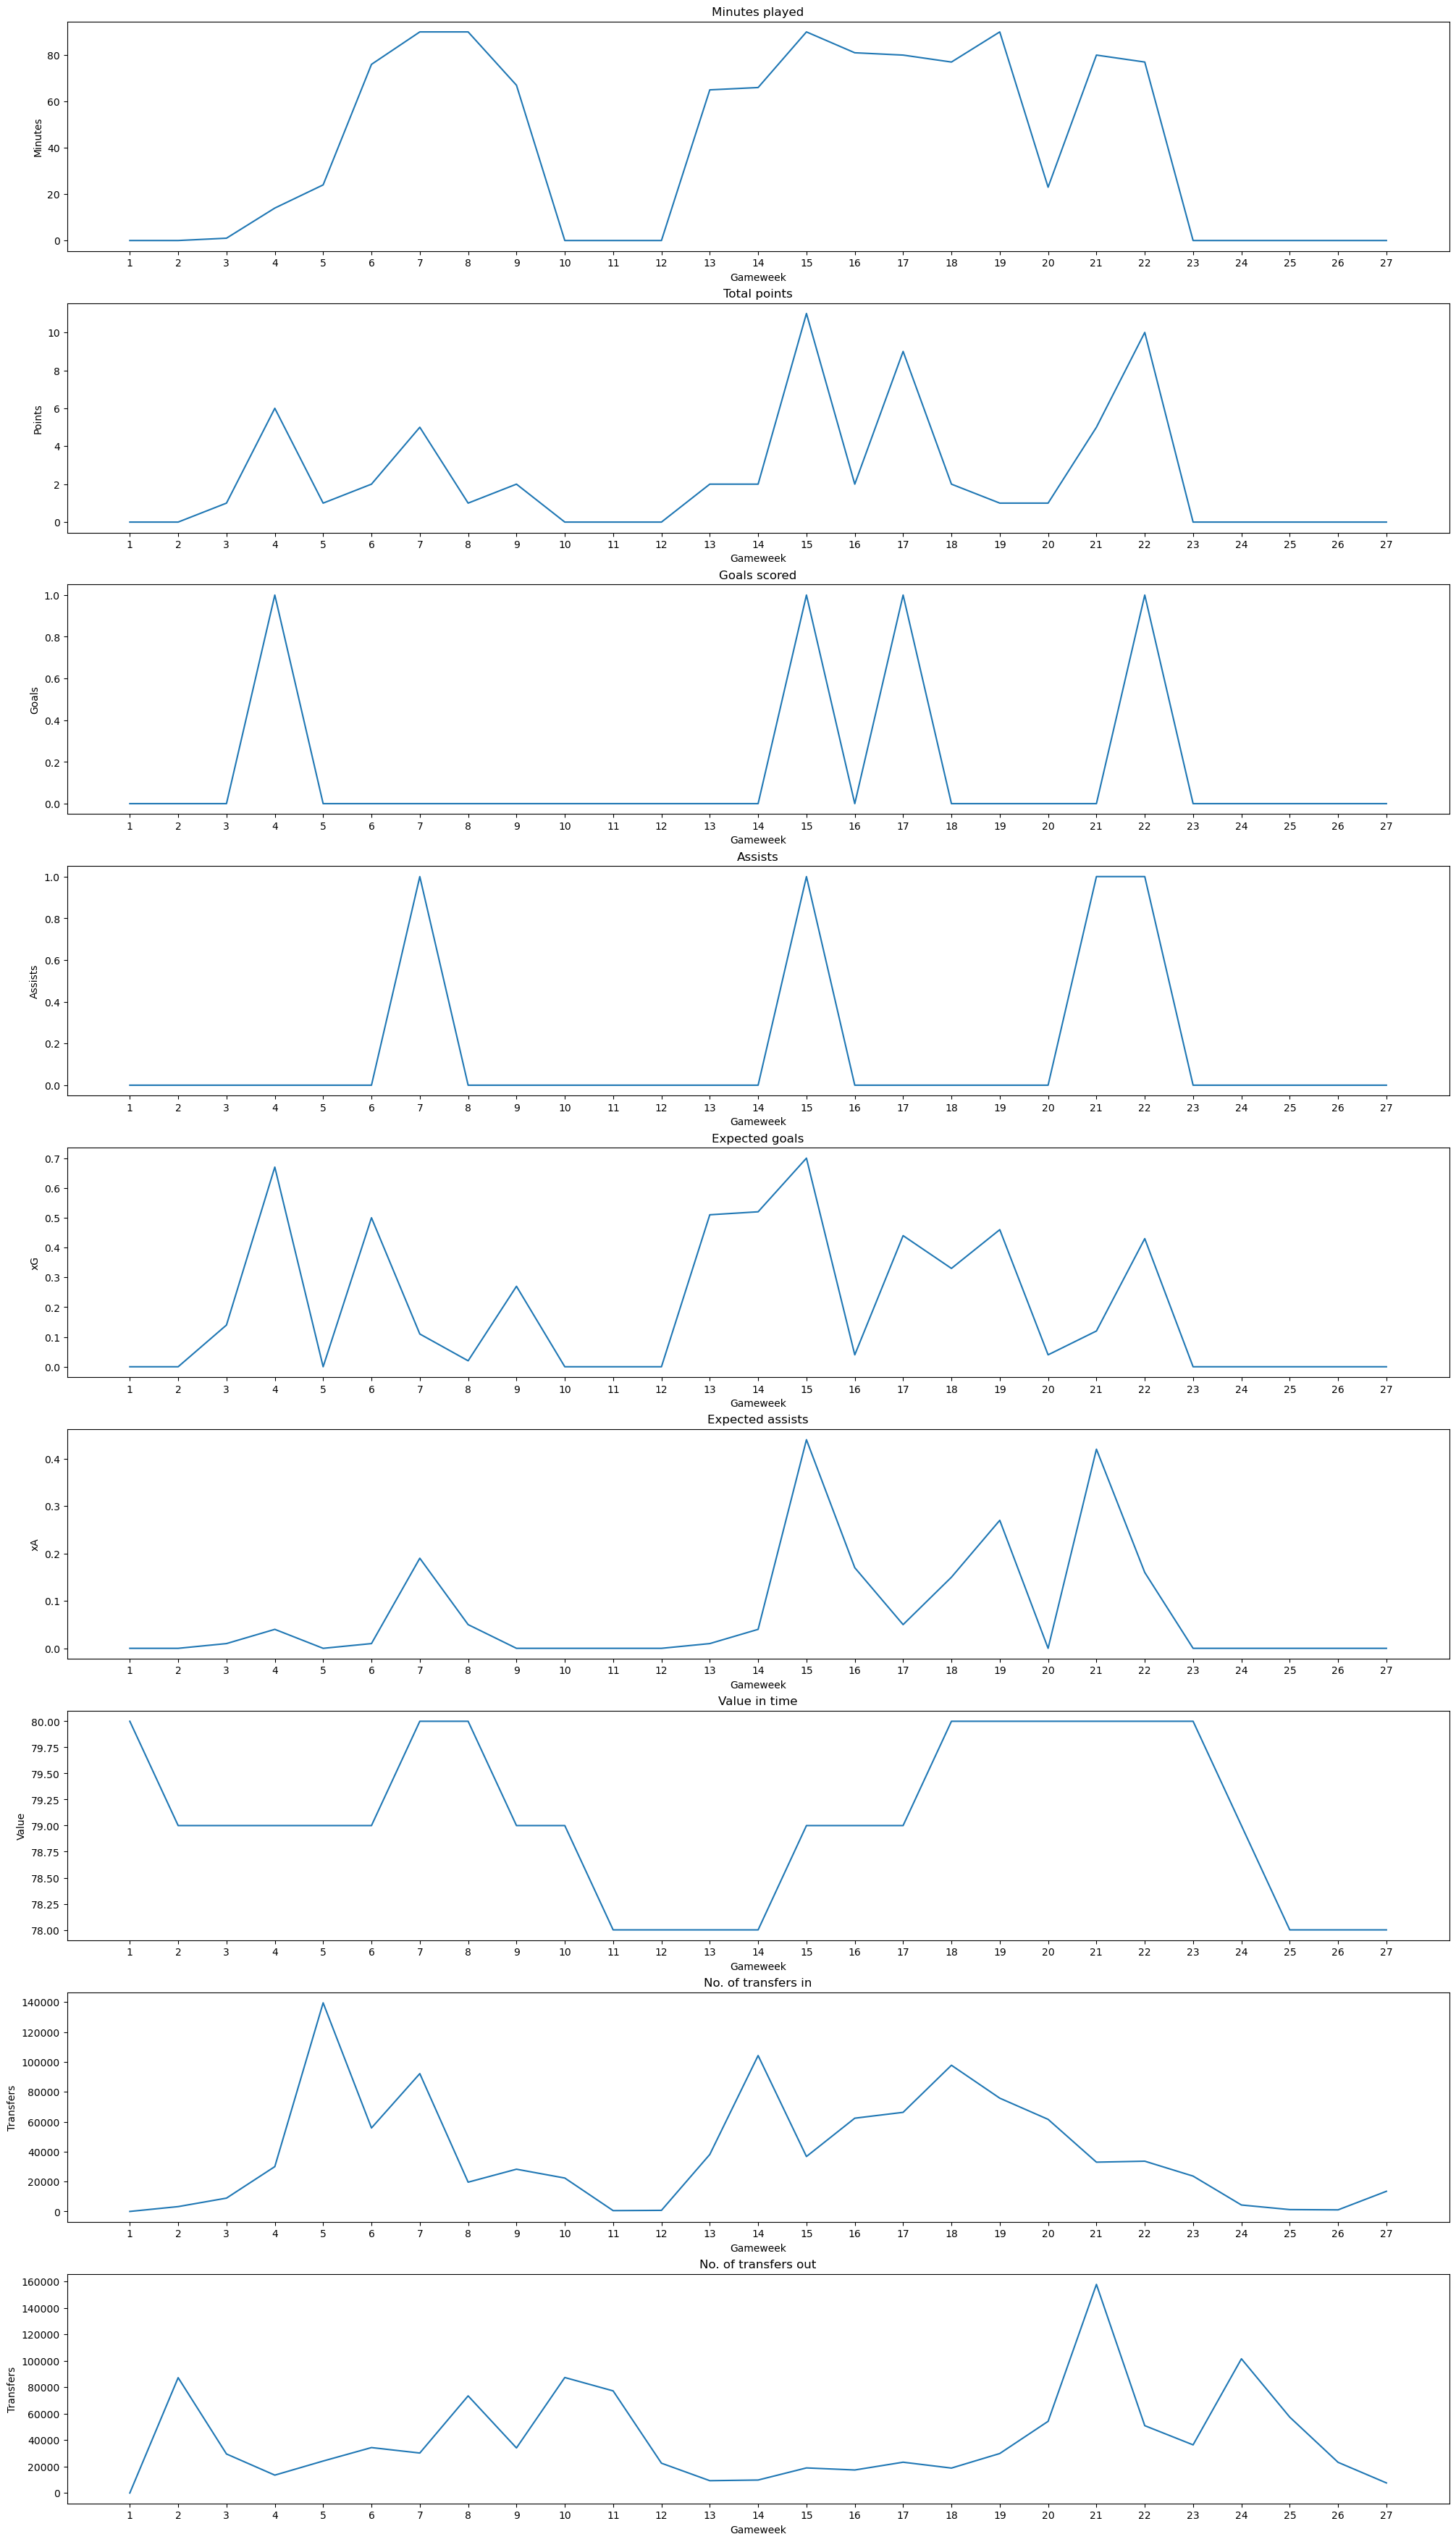

In [120]:
get_info(8)

<h1><b>VI. GET INFO ON CHOSEN MANAGER PERFORMANCE</b></h1>

In [115]:
def get_manager_info(manager_id):
    url_manager = f'https://fantasy.premierleague.com/api/entry/{manager_id}/'
    api_result_manager = requests.get(url_manager).json()
    manager_info = pd.json_normalize(api_result_manager)

    manager_info_columns = ['id', 'player_first_name', 'player_last_name', 'years_active',
                            'summary_overall_points', 'summary_overall_rank', 'summary_event_points',
                            'summary_event_rank']
    manager_info_stripped = manager_info[manager_info_columns]
    manager_info_stripped.set_index(manager_info_stripped.id, inplace=True, drop=True)

    url_manager_transfers = f'https://fantasy.premierleague.com/api/entry/{manager_id}/transfers/'
    api_result_manager_transfers = requests.get(url_manager_transfers).json()
    transfers_info = pd.json_normalize(api_result_manager_transfers)
    transfers_info['time'] = pd.to_datetime(transfers_info['time']).dt.tz_localize(None).dt.date
    transfers_number = pd.DataFrame(transfers_info.groupby('event').count().element_in.rename('transfers_per_gameweek'))
    transfers_number

    url_team_gw = f'https://fantasy.premierleague.com/api/entry/{manager_id}/event/1/picks/'
    api_team_gw = requests.get(url_team_gw).json()
    team_gw = pd.json_normalize(api_team_gw)
    team_gw_columns = ['active_chip', 'entry_history.event',
                       'entry_history.points', 'entry_history.total_points',
                       'entry_history.rank', 'entry_history.rank_sort',
                       'entry_history.overall_rank', 'entry_history.percentile_rank',
                       'entry_history.bank', 'entry_history.value',
                       'entry_history.event_transfers', 'entry_history.event_transfers_cost',
                       'entry_history.points_on_bench']
    team_gw = team_gw[team_gw_columns]

    for i in range(2, 27):  # NALEŻY ZNALEŹĆ AUTOMATYZACJĘ ILOŚCI GW + JAK WPISZESZ ZA DUŻĄ WARTOŚĆ JEST KAPLICA
        url_team_new_gw = f'https://fantasy.premierleague.com/api/entry/{manager_id}/event/{i}/picks/'
        api_team_new_gw = requests.get(url_team_new_gw).json()
        team_new_gw = pd.json_normalize(api_team_new_gw)
        team_new_gw = team_new_gw[team_gw_columns]
        team_gw = pd.concat([team_gw, team_new_gw], join='inner', axis=0)

    team_gw.index = np.arange(1, len(team_gw) + 1)

    # CHARTS
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 35))
    

    # Points per GW
    ax[0].set_title('Points per Gameweek')
    ax[0].set_ylabel('Points')
    ax[0].set_xlabel('Gameweek')
    ax[0] = sns.lineplot(data=team_gw, x=team_gw.index, y=team_gw['entry_history.points'], ax=ax[0])
    ax[0].set(xticks=np.arange(min(team_gw.index), max(team_gw.index)+1))
    

    # Total points in time
    ax[1].set_title('Total points in time')
    ax[1].set_ylabel('Points')
    ax[1].set_xlabel('Gameweek')
    ax[1] = sns.lineplot(data=team_gw, x=team_gw.index, y=team_gw['entry_history.total_points'], ax=ax[1])
    ax[1].set(xticks=np.arange(min(team_gw.index), max(team_gw.index)+1))

    # Rank per GW
    ax[2].set_title('Gameweek rank')
    ax[2].set_ylabel('Rank')
    ax[2].set_xlabel('Gameweek')
    ax[2] = sns.lineplot(data=team_gw, x=team_gw.index, y=-team_gw['entry_history.rank_sort'], ax=ax[2])
    ax[2].set(xticks=np.arange(min(team_gw.index), max(team_gw.index)+1))

    # Overall rank in time
    ax[3].set_title('Rank')
    ax[3].set_ylabel('Rank')
    ax[3].set_xlabel('Gameweek')
    ax[3] = sns.lineplot(data=team_gw, x=team_gw.index, y=-team_gw['entry_history.overall_rank'], ax=ax[3])
    ax[3].set(xticks=np.arange(min(team_gw.index), max(team_gw.index)+1))
    
    return manager_info_stripped

,id,player_first_name,player_last_name,years_active,summary_overall_points,summary_overall_rank,summary_event_points,summary_event_rank
id,,,,,,,,
6321588,6321588,Mateusz,Gimziński,7,1496,1808722,53,324964


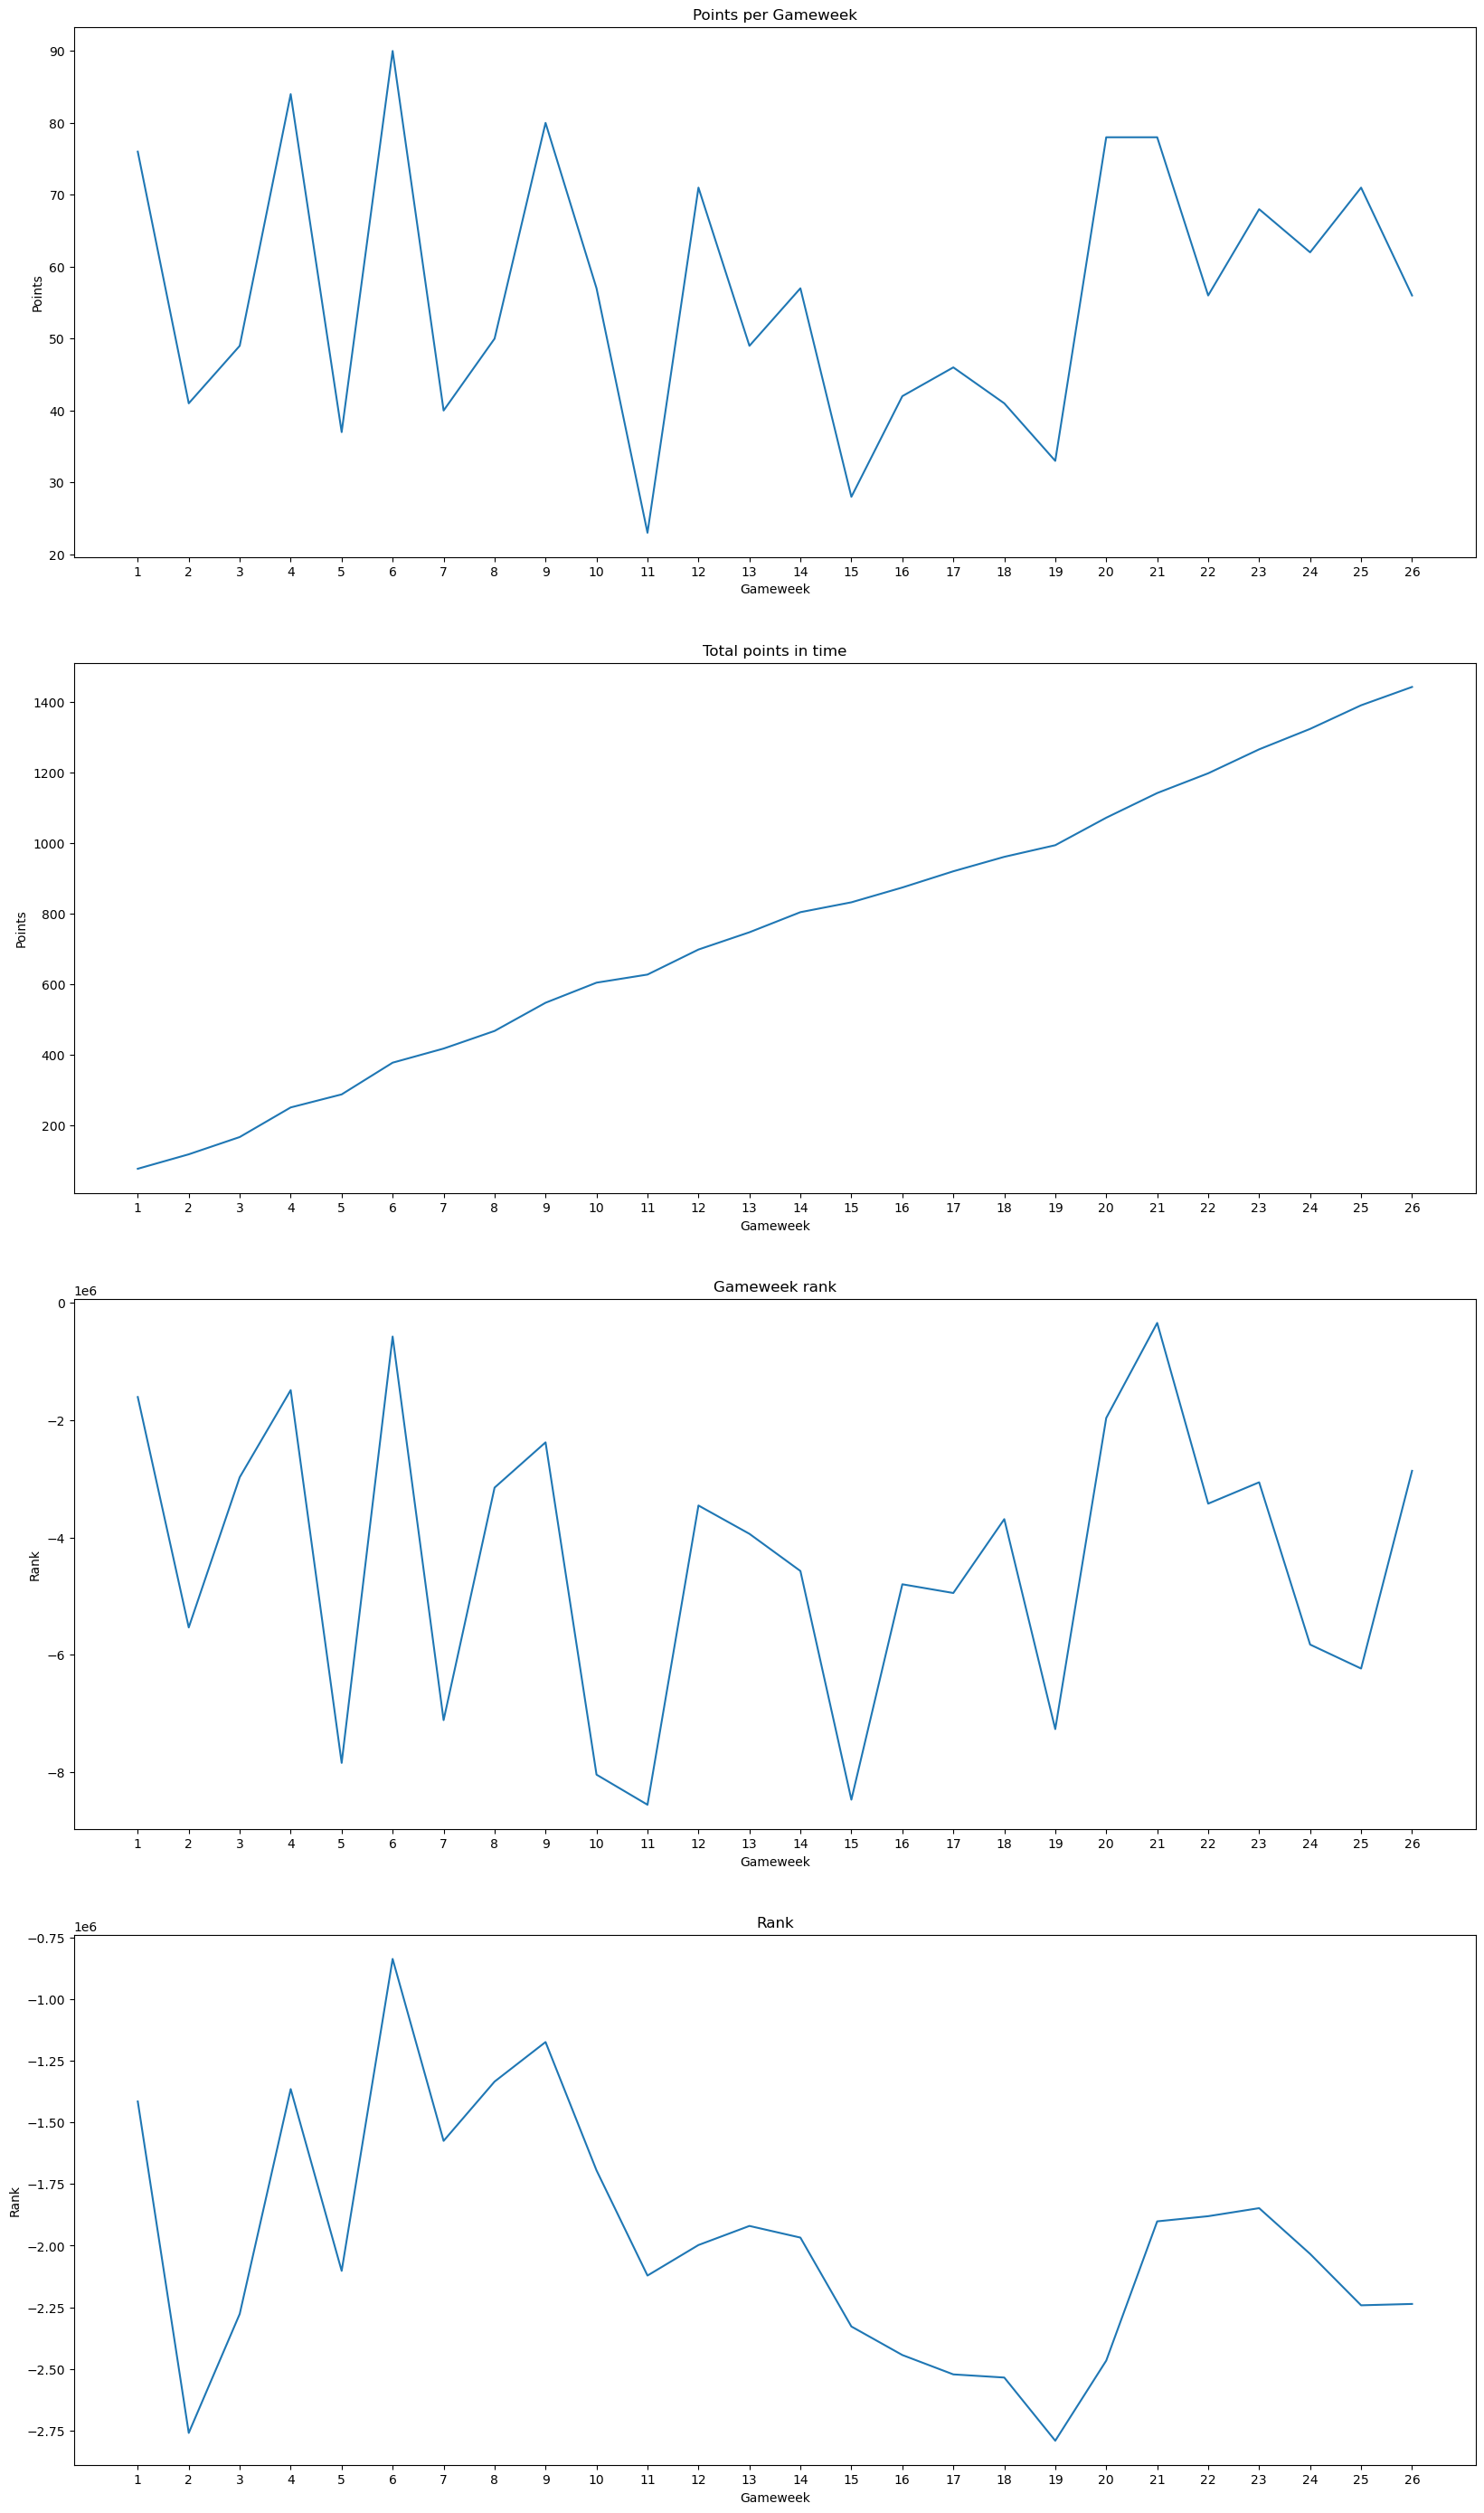

In [116]:
get_manager_info(6321588)

<h1><b>VII. GET INFO ON CHOSEN MANAGER'S TEAM ON CHOSEN GAMEWEEK</b></h1>

In [19]:
def manager_team_gw(manager_id, gameweek):
    url = f'https://fantasy.premierleague.com/api/entry/{manager_id}/event/{gameweek}/picks/'
    api_result_team_gw = requests.get(url).json()
    team_gw = pd.json_normalize(api_result_team_gw)
    team_gw_df = pd.json_normalize(team_gw.picks)
    team_gw_df = team_gw_df.melt()
    team_gw_df = pd.json_normalize(team_gw_df.value)
    team_gw_df.set_index(team_gw_df.position, drop=True, inplace=True)

    team_gw_df['points'] = 0
    for i in range(1, 16):
        player = int(team_gw_df['element'].loc[team_gw_df.index == i])
        url_player = f'https://fantasy.premierleague.com/api/element-summary/{player}/'
        api_result_player = requests.get(url_player).json()
        stats = api_result_player['history']
        df_stats = pd.json_normalize(stats)
        df_stats.index = np.arange(1, len(df_stats) + 1)
        df_stats.loc[df_stats.index == gameweek].total_points
        team_gw_df['points'].loc[team_gw_df.index == i] = int(df_stats.loc[df_stats.index == gameweek].total_points)

    return team_gw_df


In [20]:
manager_team_gw(6321588, 26)

C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\1466854011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_gw_df['points'].loc[team_gw_df.index == i] = int(df_stats.loc[df_stats.index == gameweek].total_points)
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\1466854011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_gw_df['points'].loc[team_gw_df.index == i] = int(df_stats.loc[df_stats.index == gameweek].total_points)
C:\Users\mateu\AppData\Local\Temp\ipykernel_13736\1466854011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

,element,position,multiplier,is_captain,is_vice_captain,points
position,,,,,,
1,524,1,1,False,False,2
2,131,2,1,False,False,1
3,342,3,1,False,False,6
4,5,4,1,False,False,2
5,427,5,1,False,False,0
6,412,6,1,False,False,2
7,12,7,1,False,False,6
8,353,8,1,False,False,11
9,134,9,1,False,False,7


<h1><b>VIII. GET PERFORMANCE PREDICTION FOR MANAGER'S TEAM ON CHOSEN GAMEWEEK</b></h1>

In [46]:
def team_prediction(manager_id):
    url = f'https://fantasy.premierleague.com/api/entry/{manager_id}/event/26/picks/' #zautomatyzować wybór ostatniego GW
    api_result_team_gw = requests.get(url).json()
    team_gw = pd.json_normalize(api_result_team_gw)
    team_gw_df = pd.json_normalize(team_gw.picks)
    team_gw_df = team_gw_df.melt()
    team_gw_df = pd.json_normalize(team_gw_df.value)
    team_gw_df.set_index(team_gw_df.position, drop=True, inplace=True)
    columns = ['element']
    team_gw_df = team_gw_df[columns]
    df_players_reindex = df_players.set_index(df_players.id)
    team_gw_df = team_gw_df.join(df_players_reindex['chance_of_playing_next_round'], how = 'left', on = team_gw_df.element)
    #TU WKLEIĆ SKRYPT Z SELENIUM Z PREDYKCJĄ PUNKTÓW
    return team_gw_df

In [47]:
team_prediction(6321588)

,element,chance_of_playing_next_round
position,,
1,524,100.0
2,131,100.0
3,342,100.0
4,5,100.0
5,427,100.0
6,412,100.0
7,12,100.0
8,353,NaN
9,134,100.0
